In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

Matplotlib is building the font cache using fc-list. This may take a moment.


In [11]:
# Change this for the different graphs
dataset = "cifar100"

In [12]:
csv = f"increasing-{dataset}.csv"
df_cf10vs100 = pd.read_csv(csv)

df_cf10vs100.head(10)['augnum']

0    10%
1    10%
2    10%
3    10%
4    10%
5    20%
6    20%
7    20%
8    20%
9    20%
Name: augnum, dtype: object

In [13]:
df_cf10vs100.head(5)

,Dataset,Augmentation type,instanceNum,iterNum,acc,cutout,augnum
0,CIFAR100,Mobius 10%,600,50k,0.8262,0,10%
1,CIFAR100,Mobius 10%,600,50k,0.8255,0,10%
2,CIFAR100,Mobius 10%,600,50k,0.8257,0,10%
3,CIFAR100,Mobius 10%,600,50k,0.8269,0,10%
4,CIFAR100,Mobius 10%,600,50k,0.8289,0,10%


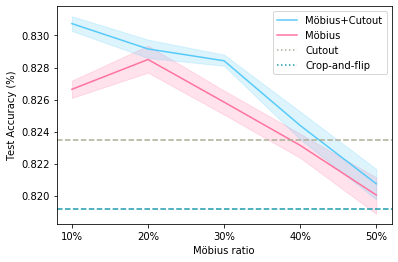

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

palette = ["#FF729F", "#56CBF9", "#ACAD94", "#1B9AAA"]
# palette = ["#9B7EDE", "#832161", "#0F8B8D", "#FE5E41"]
sns.set_palette(palette)

g = sns.lineplot(x="augnum", 
             y="acc", 
             hue="cutout", 
             ci=68,
             data=df_cf10vs100.head(50));

g.set(xlabel='Möbius ratio', ylabel='Test Accuracy (%)')

if dataset == "cifar10":
    g.axes.axhline(0.97128, ls='--', color='C2')
    g.axes.axhline(0.96466, ls='--', color='C3')
else:
    g.axes.axhline(0.82348, ls='--', color='C2')
    g.axes.axhline(0.81914, ls='--', color='C3')

line1 = Line2D([0,1],[0,1],linestyle='-', color='C0')
line2 = Line2D([0,1],[0,1],linestyle='-', color='C1')
line3 = Line2D([0,1],[0,1],linestyle=':', color='C2')
line4 = Line2D([0,1],[0,1],linestyle=':', color='C3')

g.legend([line2, line1, line3, line4], ['Möbius+Cutout', 'Möbius', 'Cutout', 'Crop-and-flip'])
plt.savefig(f"graph-{dataset}.png")
plt.show()
# df_cf10vs100

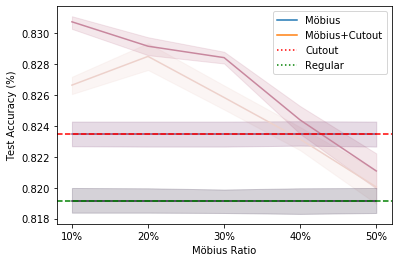

In [6]:
df_cf10vs100 = pd.read_csv("cifar10vs100.csv")

g = sns.lineplot(x="augnum", 
             y="acc", 
             hue="cutout", 
             ci=68,
             data=df_cf10vs100);

# plt.errorbar(df_cf10vs100.head(10)['augnum'], df_cf10vs100.head(10)['acc'], yerr=df_cf10vs100.head(10)['std'], uplims=True, label='uplims=True')


g.set(xlabel='Möbius Ratio', ylabel='Test Accuracy (%)')

g.axes.axhline(0.82348, ls='--', color='red')
# g.axes.text(0.3,88.21, "Some text")
g.axes.axhline(0.81914, ls='--', color='green')

line1 = Line2D([0,1],[0,1],linestyle='-', color='C0')
line2 = Line2D([0,1],[0,1],linestyle='-', color='C1')
line3 = Line2D([0,1],[0,1],linestyle=':', color='r')
line4 = Line2D([0,1],[0,1],linestyle=':', color='g')
# g.axes.text(0.3,88.71, "Some text")
g.legend([line1, line2, line3, line4], ['Möbius', 'Möbius+Cutout', 'Cutout', 'Regular'])
plt.savefig("mobius-cp1.png")
plt.show()
# df_cf10vs100